# Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load and Prepare the Data

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

# Data preprocessing

In [ ]:
# Convert the values in Heart Disease column to 0 and 1
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [ ]:
df.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

There's not any null values

In [ ]:
df.duplicated().any()

False

There's no duplicate

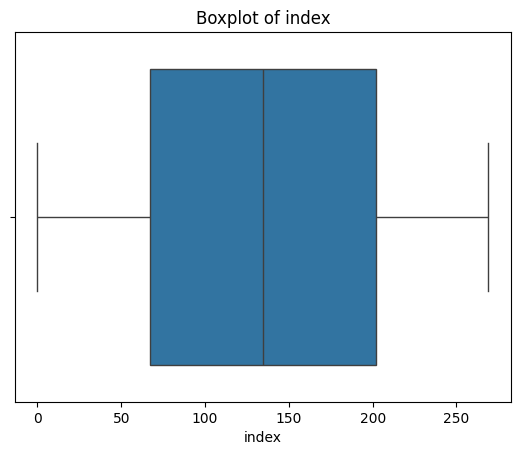

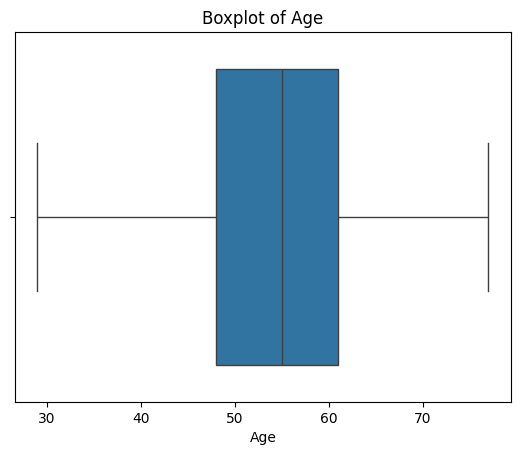

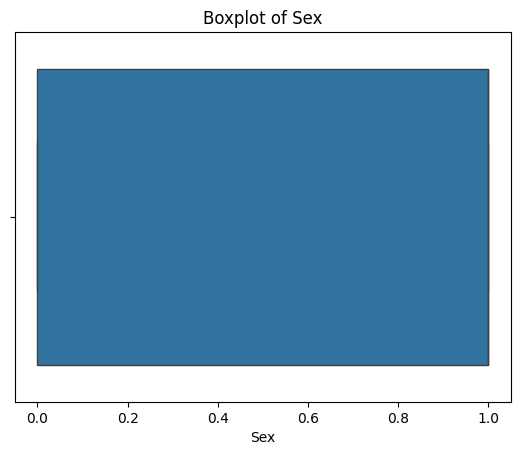

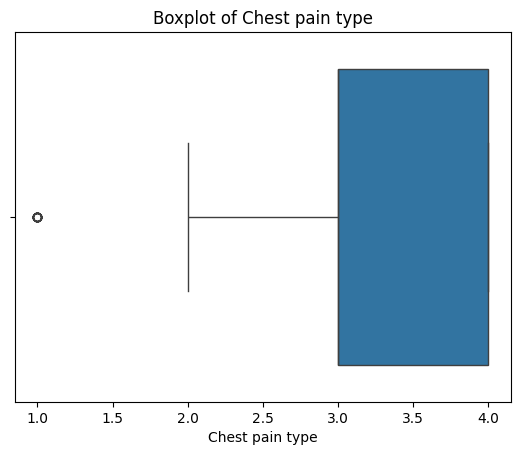

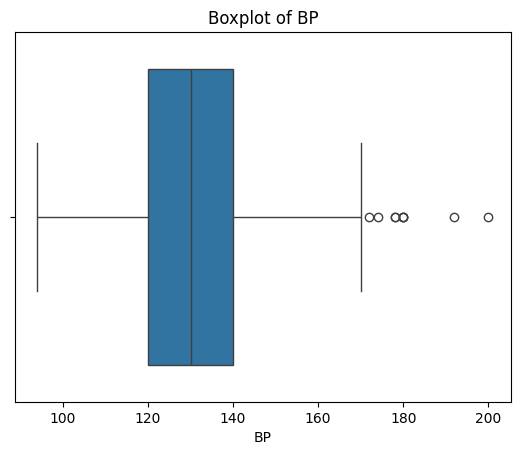

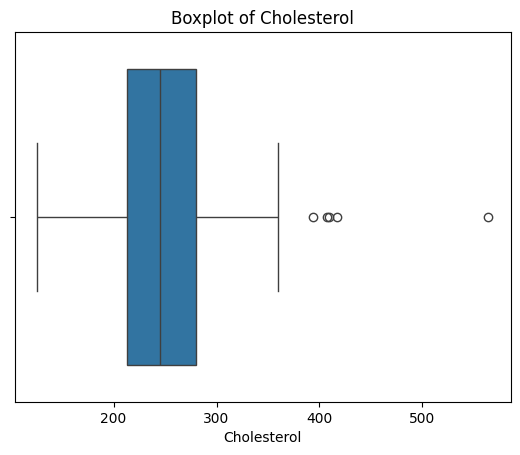

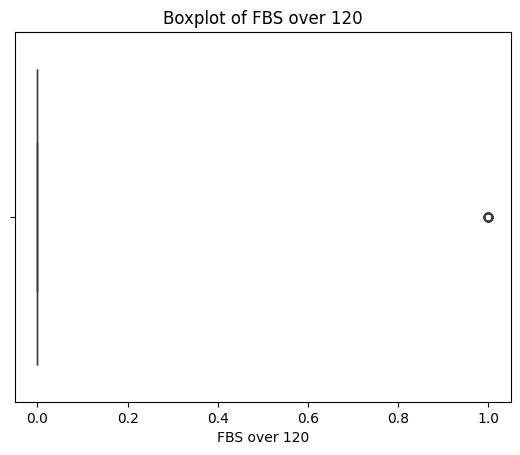

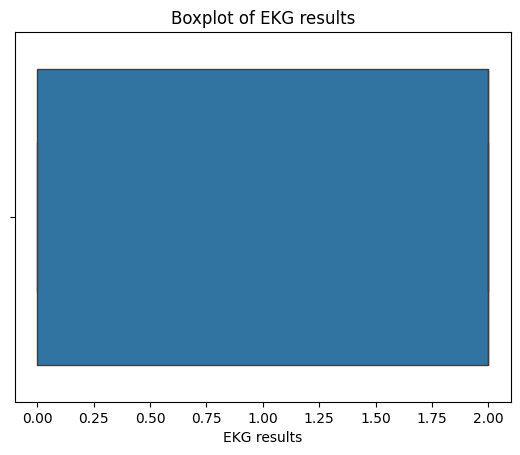

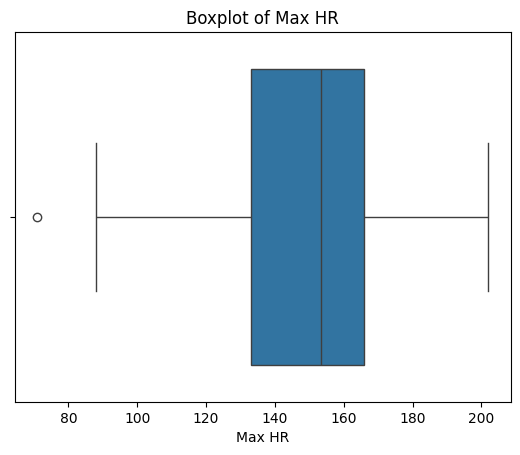

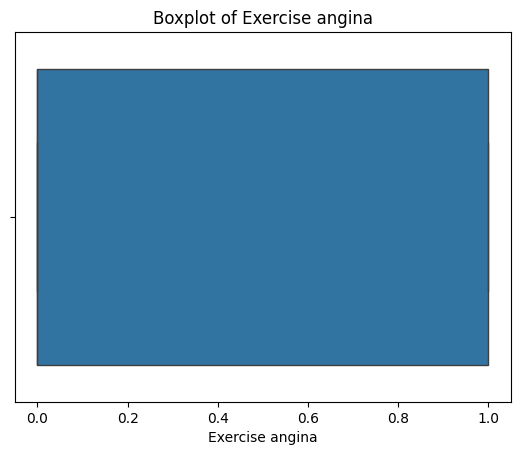

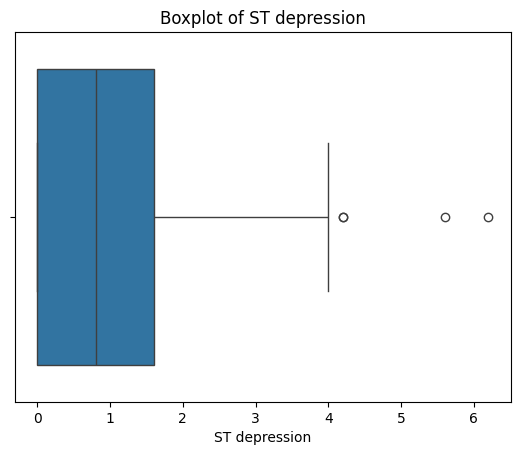

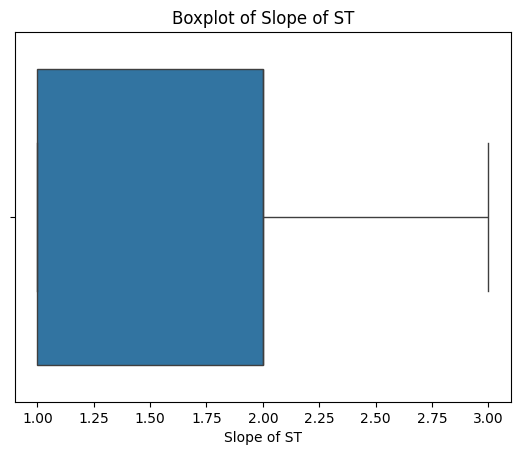

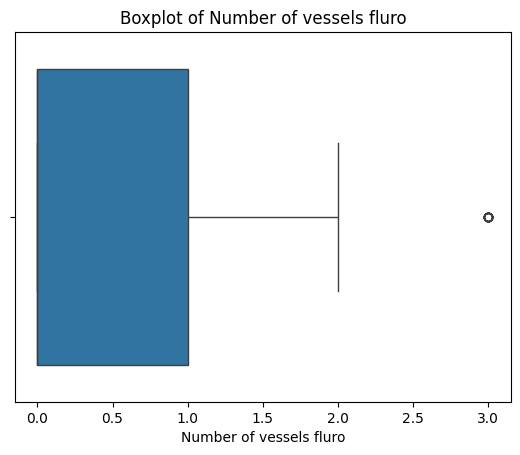

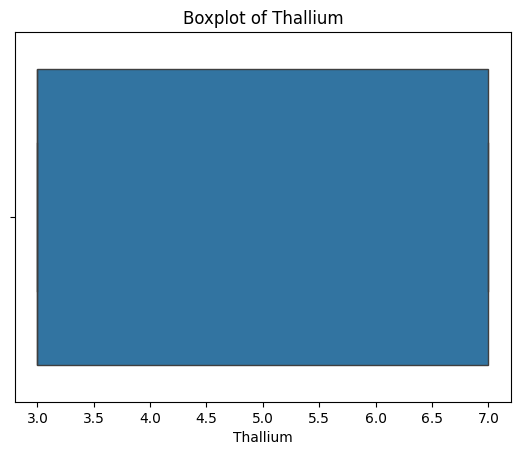

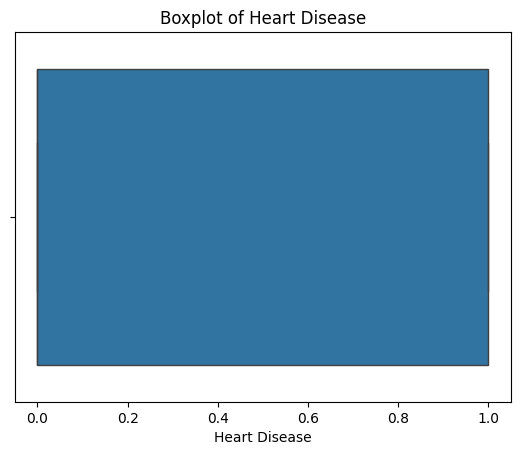

In [ ]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
def check_outlier(age, col, lower_bound, upper_bound):
  if col < lower_bound or col > upper_bound:
    return True
  return False

In [ ]:
def replace_outliers(df, col, lower_bound, upper_bound):
  for i, row in df.iterrows():
    age = row['Age']
    if check_outlier(age, row[col], lower_bound, upper_bound):
      median_val = df[(df['Age'] >= age - 5) & (df['Age'] <= age + 5)][col].median()
      df.at[i, col] = median_val
  return df


In [ ]:
outliers = ['Cholesterol', 'BP','Max HR','ST depression']
for col in outliers:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3  - q1
  lower_bound = q1 - 1.5 * (iqr)
  upper_bound = q3 + 1.5 * (iqr)
  df = replace_outliers(df, col, lower_bound, upper_bound)

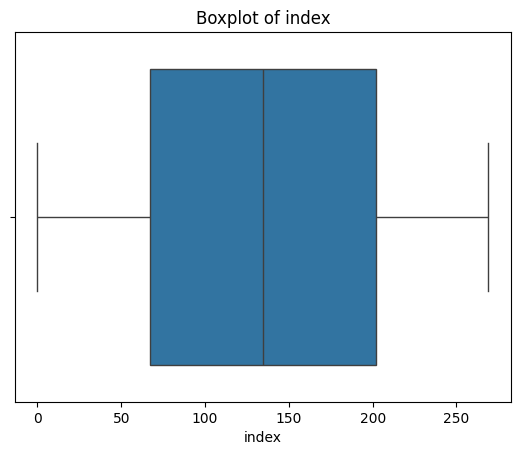

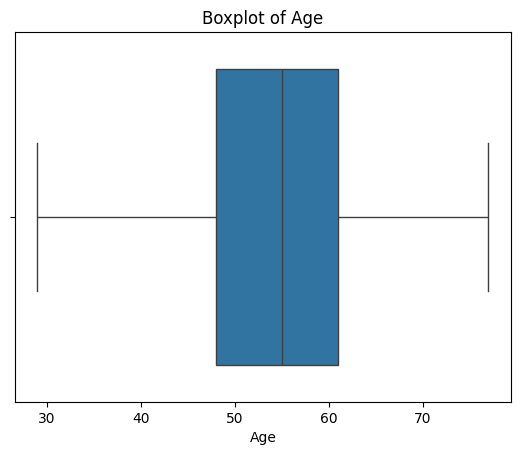

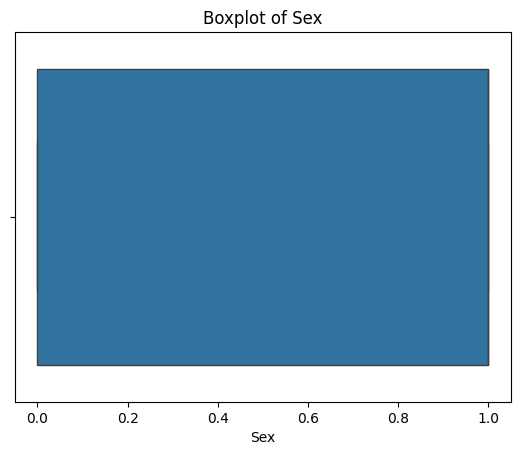

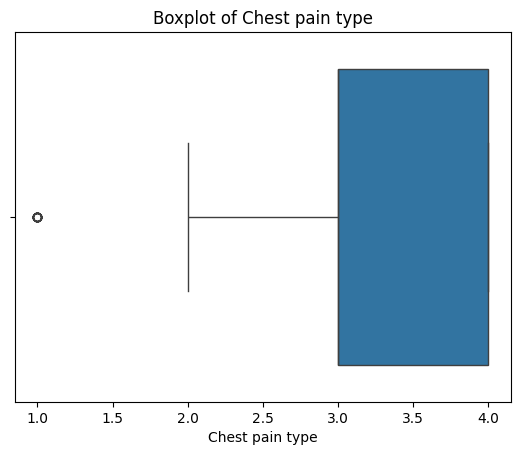

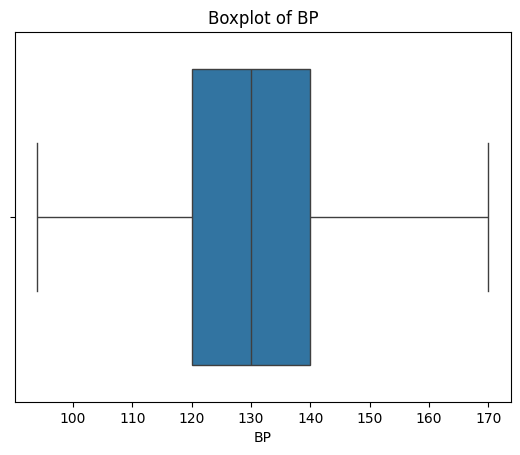

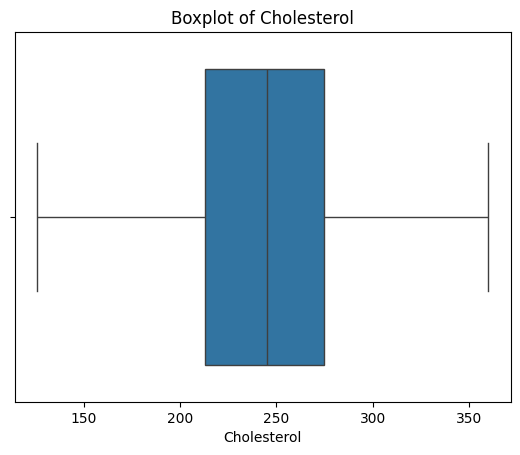

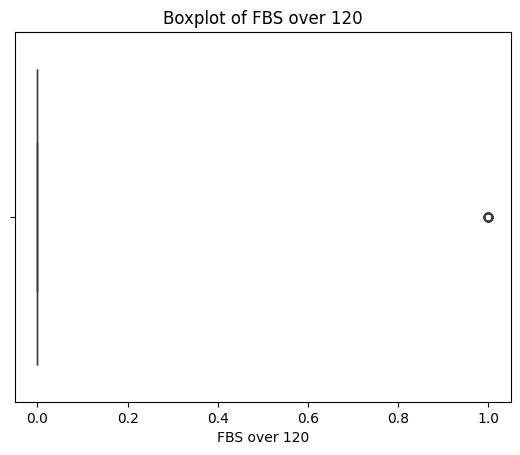

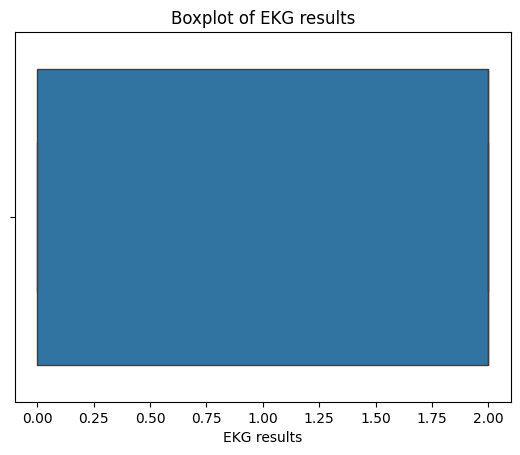

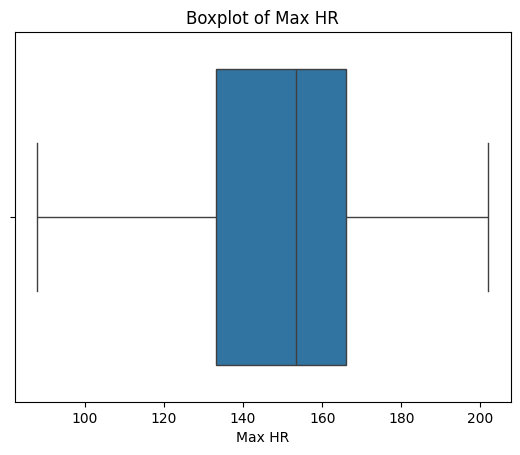

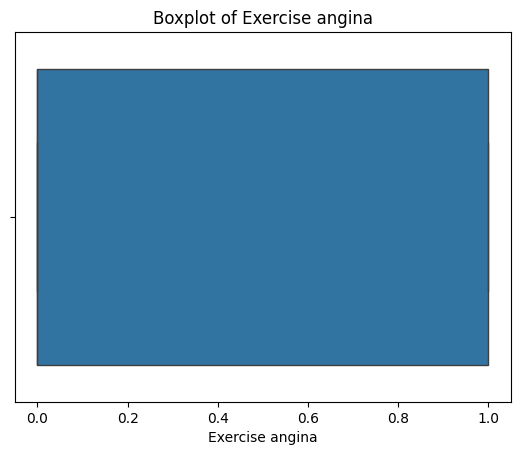

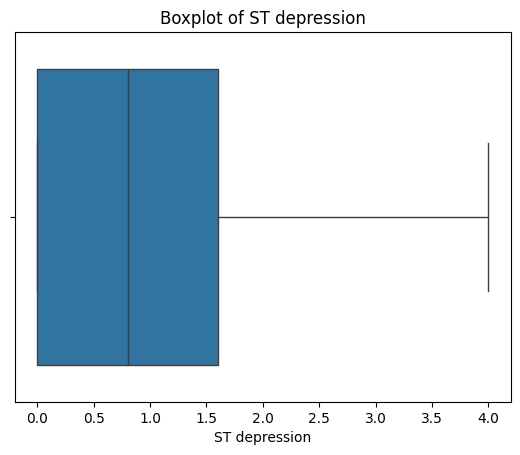

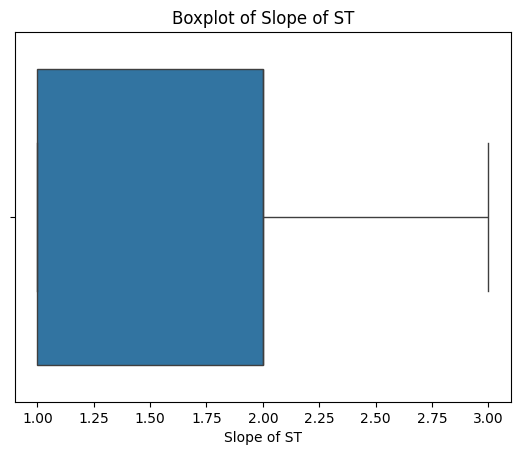

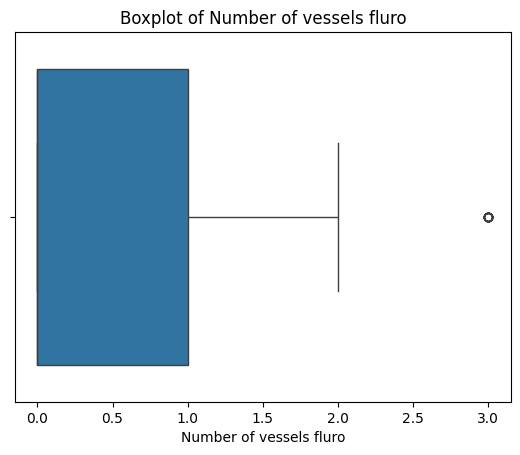

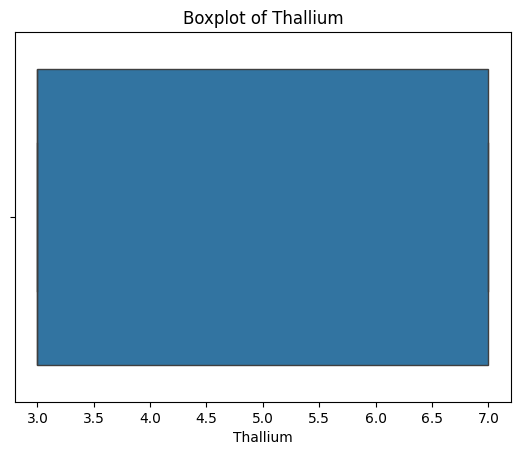

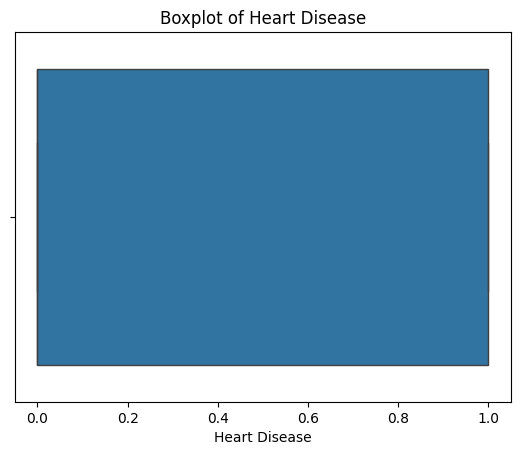

In [ ]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


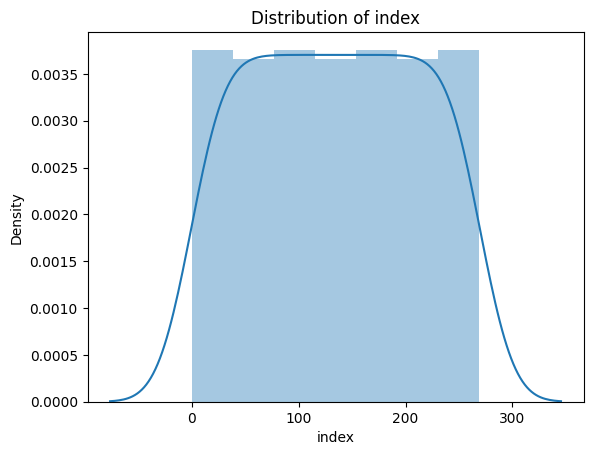

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


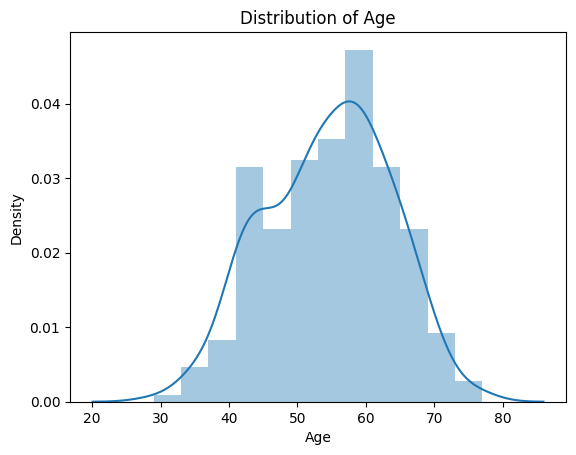

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


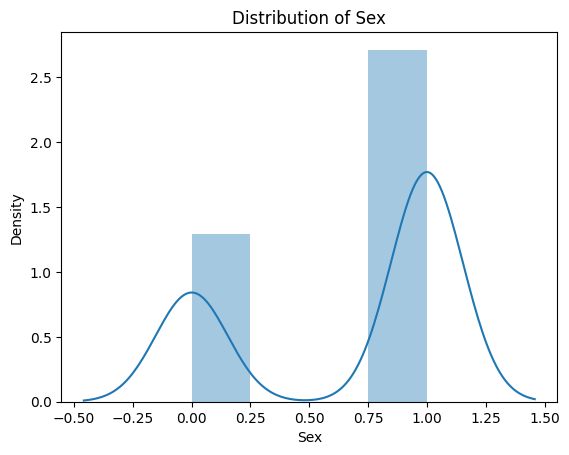

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


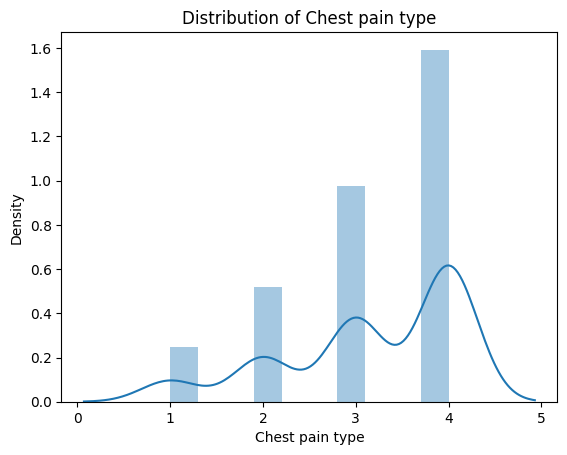

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


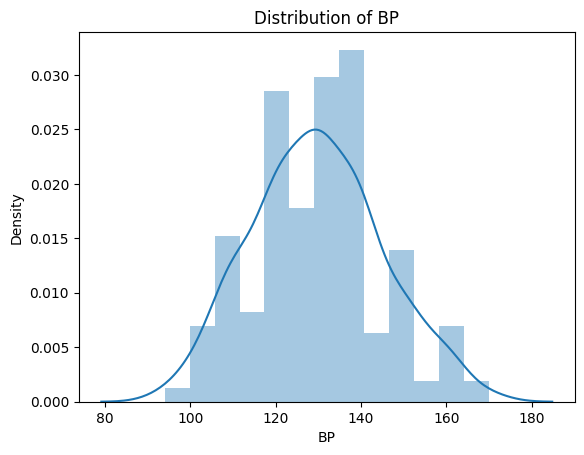

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


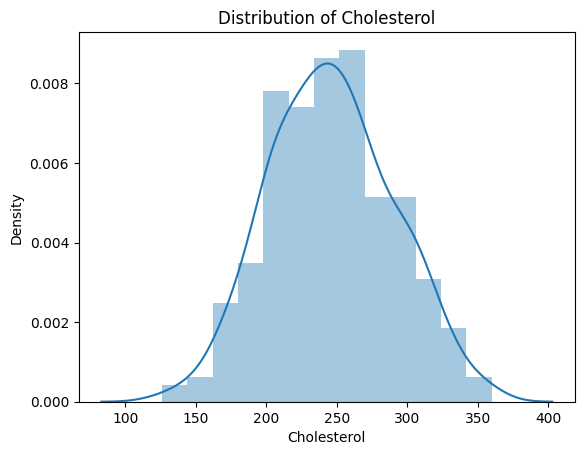

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


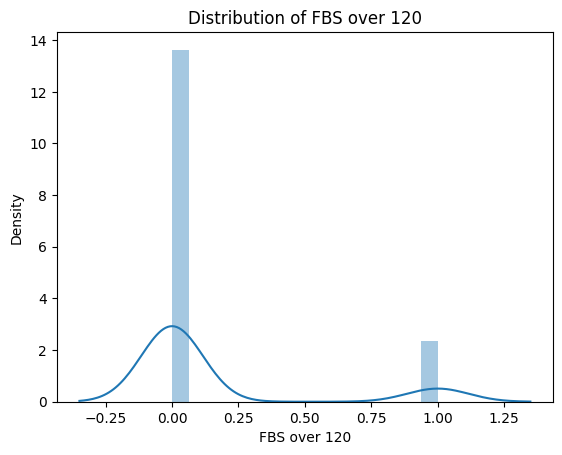

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


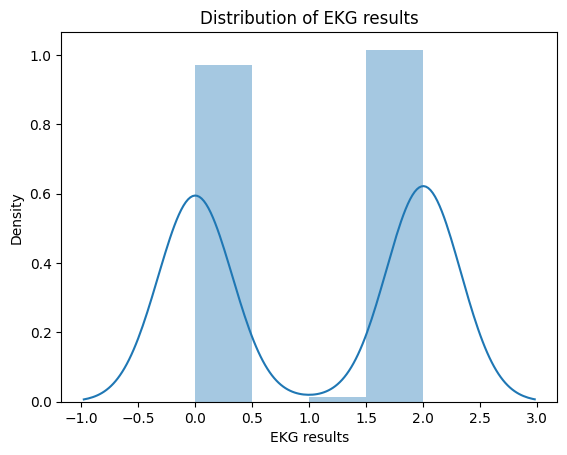

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


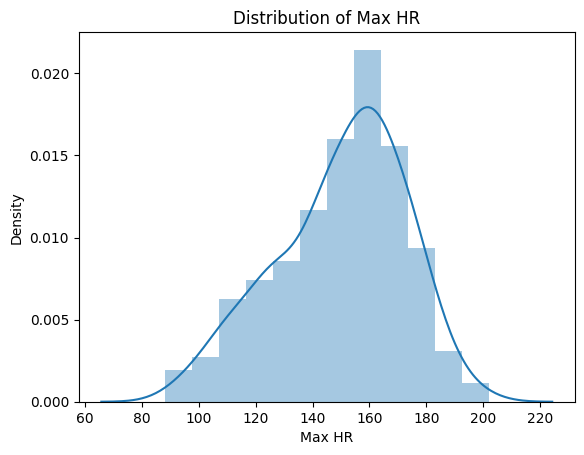

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


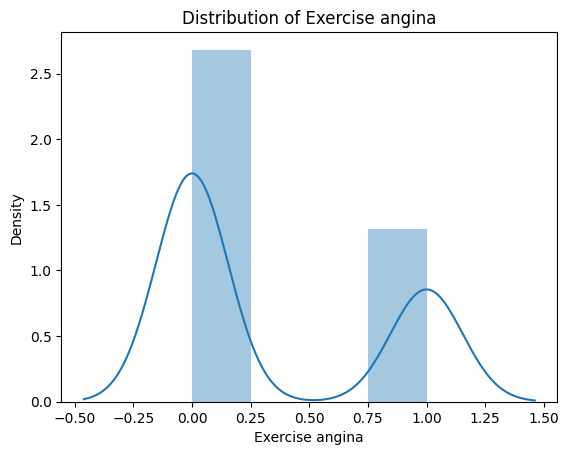

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


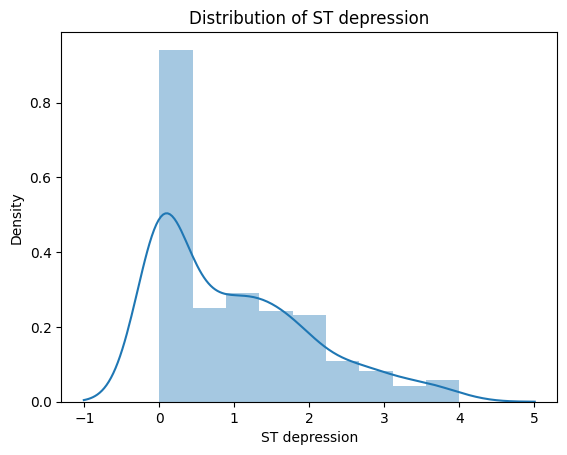

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


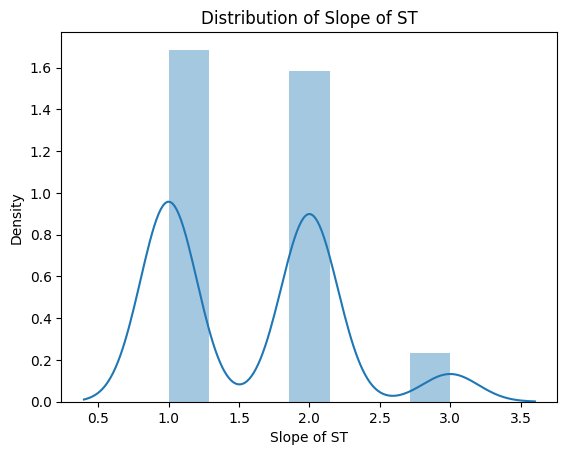

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


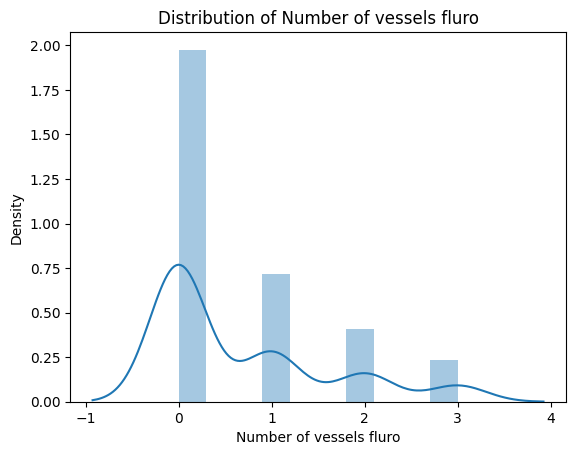

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


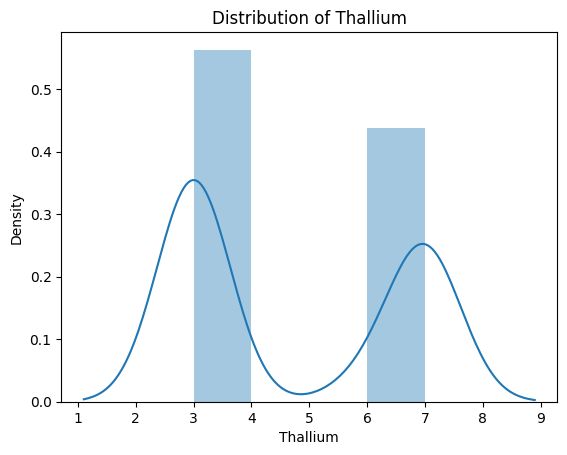

<ipython-input-14-46a1f30badb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


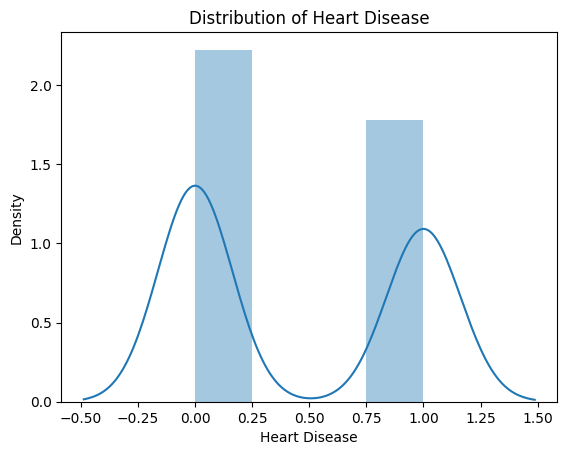

In [ ]:

for col in df.columns:
    plt.figure()
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
# prompt: print the number of 0s and 1s in heart disease column

print(df['Heart Disease'].value_counts())


Heart Disease
0    150
1    120
Name: count, dtype: int64


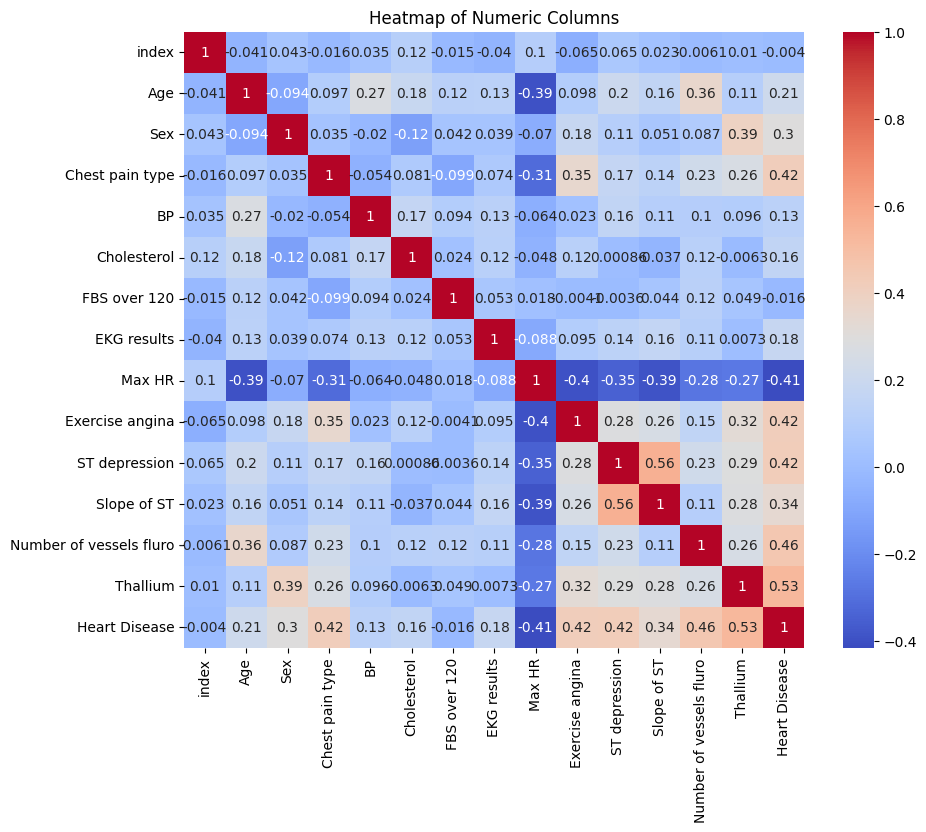

In [ ]:
# Create a heatmap of the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numeric Columns')
plt.show()


## Splitting the data

In [ ]:
# Split the dataset into features and target variable
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaleing

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature sellecting

In [ ]:
S_X = df[['Chest pain type', 'Exercise angina', 'ST depression', 'Number of vessels fluro', 'Thallium']]
S_y = df['Heart Disease']
SX_train, SX_test, Sy_train, Sy_test = train_test_split(S_X, S_y, test_size=0.2, random_state=42)

# ML Models

## LR

In [ ]:
# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions and evaluate on the train set
lr_train_pred = model_lr.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)*100
lr_train_conf_matrix = confusion_matrix(y_train, lr_train_pred)
lr_train_report = classification_report(y_train, lr_train_pred)

In [ ]:
# training accuracy
print("Logistic Regression training results:")
print("Accuracy: ", lr_train_accuracy, "%")
print("Confusion Matrix:\n", lr_train_conf_matrix)
print("Classification Report:\n", lr_train_report)


Logistic Regression training results:
Accuracy:  84.25925925925925 %
Confusion Matrix:
 [[102  15]
 [ 19  80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       117
           1       0.84      0.81      0.82        99

    accuracy                           0.84       216
   macro avg       0.84      0.84      0.84       216
weighted avg       0.84      0.84      0.84       216



In [ ]:
# Make predictions and evaluate
lr_test_pred = model_lr.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)*100
lr_test_conf_matrix = confusion_matrix(y_test, lr_test_pred)
lr_test_report = classification_report(y_test, lr_test_pred)


In [ ]:
print("Logistic Regression Test Set Results:")
print("Accuracy:", lr_test_accuracy,"%")
print("Confusion Matrix:\n", lr_test_conf_matrix)
print("Classification Report:\n", lr_test_report)

Logistic Regression Test Set Results:
Accuracy: 83.33333333333334 %
Confusion Matrix:
 [[30  3]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



### After feature sellecting

In [ ]:
# Fit the model on the training data
model_lr.fit(SX_train, Sy_train)

# training accuracy

Slr_train_pred = model_lr.predict(SX_train)
Slr_train_accuracy = accuracy_score(Sy_train, Slr_train_pred)*100
Slr_train_conf_matrix = confusion_matrix(Sy_train, Slr_train_pred)
Slr_train_report = classification_report(Sy_train, Slr_train_pred)

print("Logistic Regression training results after feature sellecting:")
print("Accuracy: ", Slr_train_accuracy , "%")
print("Confusion Matrix:\n", Slr_train_conf_matrix)
print("Classification Report:\n", Slr_train_report)



Logistic Regression training results after feature sellecting:
Accuracy:  84.25925925925925 %
Confusion Matrix:
 [[102  15]
 [ 19  80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       117
           1       0.84      0.81      0.82        99

    accuracy                           0.84       216
   macro avg       0.84      0.84      0.84       216
weighted avg       0.84      0.84      0.84       216



In [ ]:
# Make predictions and evaluate on the test set
Slr_test_pred = model_lr.predict(SX_test)
Slr_test_accuracy = accuracy_score(Sy_test, Slr_test_pred)
Slr_test_conf_matrix = confusion_matrix(Sy_test, Slr_test_pred)
Slr_test_report = classification_report(Sy_test, Slr_test_pred)

print("Logistic Regression test results after feature sellecting:")
print("Accuracy:", Slr_test_accuracy*100,"%")
print("Confusion Matrix:\n", Slr_test_conf_matrix)
print("Classification Report:\n", Slr_test_report)

Logistic Regression test results after feature sellecting:
Accuracy: 88.88888888888889 %
Confusion Matrix:
 [[32  1]
 [ 5 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



### Hypermeter tuning

In [ ]:
# Define the model and parameters
model_lr = LogisticRegression(max_iter=1000)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Set up the grid search with cross-validation
model_best_lr = GridSearchCV(model_lr, parameters, cv=5, scoring='accuracy')

# Fit GridSearchCV
model_best_lr.fit(SX_train, Sy_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
# Best parameters and best score
print("Best parameters:", model_best_lr.best_params_)
print("Best cross-validation accuracy: {:.4f} %".format(model_best_lr.best_score_*100))
print("Validation set accuracy: {:.4f} %".format(model_best_lr.score(SX_test, Sy_test)*100))

Best parameters: {'C': 10}
Best cross-validation accuracy: 83.8372 %
Validation set accuracy: 88.8889 %


## Neural Networks

In [ ]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
# Define the model
model_nn = Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model_nn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5173 - loss: 0.7179 - val_accuracy: 0.6296 - val_loss: 0.6508
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5676 - loss: 0.6887 - val_accuracy: 0.6667 - val_loss: 0.6171
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6569 - loss: 0.6052 - val_accuracy: 0.7222 - val_loss: 0.5872
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6859 - loss: 0.5932 - val_accuracy: 0.7407 - val_loss: 0.5622
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7512 - loss: 0.5491 - val_accuracy: 0.7593 - val_loss: 0.5399
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7090 - loss: 0.5668 - val_accuracy: 0.7963 - val_loss: 0.5205
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7230 - loss: 0.5409 - val_accuracy: 0.8333 - val_loss: 0.5021
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7948 - loss: 0.5052 - val_accuracy: 0.8333 - val_loss: 0.4857


In [ ]:
# Evaluate the model on the train set
nn_train_loss, nn_train_accuracy = model_nn.evaluate(X_train, y_train)
print("Neural network results on training set")
print("train Loss: ", nn_train_loss*100,"%")
print("train Accuracy: ", nn_train_accuracy*100,"%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.2822 
Neural network results on training set
train Loss:  25.79837739467621 %
train Accuracy:  87.96296119689941 %


In [ ]:
# Evaluate the model on the test set
nn_test_loss, nn_test_accuracy = model_nn.evaluate(X_test, y_test)
print("Neural network results on test set")
print("test Loss: ", nn_test_loss*100,"%")
print("test Accuracy: ", nn_test_accuracy*100,"%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8947 - loss: 0.3089 
Neural network results on test set
test Loss:  31.36691451072693 %
test Accuracy:  88.88888955116272 %


### Afetr feature sellecting

In [ ]:
# Define the model
model_nn2 = Sequential([
    layers.Dense(64, activation='relu', input_shape=(SX_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn2.compile(optimizer='adam',
              loss='binary_crossentropy',  # 'binary_crossentropy' for binary classification
              metrics=['accuracy'])  # Use 'accuracy' for binary classification

In [ ]:
# Train the model
history2 = model_nn2.fit(SX_train, Sy_train, epochs=50, validation_data=(SX_test, Sy_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5312 - loss: 0.8325 - val_accuracy: 0.4074 - val_loss: 0.7049
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5017 - loss: 0.7871 - val_accuracy: 0.3704 - val_loss: 0.6999
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5794 - loss: 0.7171 - val_accuracy: 0.3889 - val_loss: 0.6883
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5189 - loss: 0.7723 - val_accuracy: 0.5741 - val_loss: 0.6726
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4824 - loss: 0.7498 - val_accuracy: 0.6296 - val_loss: 0.6637
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6037 - loss: 0.7182 - val_accuracy: 0.6667 - val_loss: 0.6591
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5332 - loss: 0.7115 - val_accuracy: 0.6852 - val_loss: 0.6543
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5110 - loss: 0.7162 - val_accuracy: 0.7222 - val_loss: 0.6496
Epoch

In [ ]:
# Evaluate the model on the train set
Snn_train_loss, Snn_train_accuracy = model_nn2.evaluate(SX_train, Sy_train)
print("Neural Network train results after feature selecting")
print("test Loss: ", Snn_train_loss*100,"%")
print("test Accuracy: ", Snn_train_accuracy*100,"%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.4882 
Neural Network train results after feature selecting
test Loss:  45.86643874645233 %
test Accuracy:  79.16666865348816 %


In [ ]:
# Evaluate the model on the test set
Snn_test_loss, Snn_test_accuracy = model_nn2.evaluate(SX_test, Sy_test)
print("Neural Network test results after feature selecting")
print("test Loss: ", Snn_test_loss*100,"%")
print("test Accuracy: ", Snn_test_accuracy*100,"%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7913 - loss: 0.4715
Neural Network test results after feature selecting
test Loss:  47.536250948905945 %
test Accuracy:  79.62962985038757 %


## SVM

In [ ]:
# Create an SVM classifier
model_svm = SVC(kernel='linear')

In [ ]:
# Train the classifier
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict the labels for the training set
svm_train_pred = model_svm.predict(X_train)

In [ ]:
# Make predictions and evaluate on the train set
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)*100
svm_train_conf_matrix = confusion_matrix(y_train, svm_train_pred)
svm_train_report = classification_report(y_train, svm_train_pred)

# training accuracy
print("SVM training results:")
print("Accuracy: ", svm_train_accuracy, "%")
print("Confusion Matrix:\n", svm_train_conf_matrix)
print("Classification Report:\n", svm_train_report)


SVM training results:
Accuracy:  86.11111111111111 %
Confusion Matrix:
 [[105  12]
 [ 18  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       117
           1       0.87      0.82      0.84        99

    accuracy                           0.86       216
   macro avg       0.86      0.86      0.86       216
weighted avg       0.86      0.86      0.86       216



In [ ]:
# Predict the labels for the test set
svm_test_pred = model_svm.predict(X_test)

In [ ]:
# Make predictions and evaluate on the test set
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)*100
svm_test_conf_matrix = confusion_matrix(y_test, svm_test_pred)
svm_test_report = classification_report(y_test, svm_test_pred)

print("SVM Test Set Results:")
print("Accuracy:", svm_test_accuracy, "%")
print("Confusion Matrix:\n", svm_test_conf_matrix)
print("Classification Report:\n", svm_test_report)

SVM Test Set Results:
Accuracy: 85.18518518518519 %
Confusion Matrix:
 [[31  2]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



### After Feature selecting

In [ ]:
# Train the classifier
model_svm.fit(SX_train, Sy_train)

# Predict the labels for the training set
Ssvm_train_pred = model_svm.predict(SX_train)

# Evaluate on the train set with feature sellection
Ssvm_train_accuracy = accuracy_score(Sy_train, Ssvm_train_pred)*100
Ssvm_train_conf_matrix = confusion_matrix(Sy_train, Ssvm_train_pred)
Ssvm_train_report = classification_report(y_train, Ssvm_train_pred)

# training accuracy
print("SVM training results after feature sellection:")
print("Accuracy: ", accuracy_score(Sy_train, Ssvm_train_pred) * 100, "%")
print("Confusion Matrix:\n", confusion_matrix(Sy_train, Ssvm_train_pred))
print("Classification Report:\n", classification_report(Sy_train, Ssvm_train_pred))


SVM training results after feature sellection:
Accuracy:  83.79629629629629 %
Confusion Matrix:
 [[102  15]
 [ 20  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       117
           1       0.84      0.80      0.82        99

    accuracy                           0.84       216
   macro avg       0.84      0.83      0.84       216
weighted avg       0.84      0.84      0.84       216



In [ ]:
# Predict the labels for the test set
Ssvm_test_pred = model_svm.predict(SX_test)

Ssvm_test_accuracy = accuracy_score(Sy_test, Ssvm_test_pred) *100
Ssvm_test_conf_matrix = confusion_matrix(Sy_test, Ssvm_test_pred)
Ssvm_test_report = classification_report(Sy_test, Ssvm_test_pred)

print("Test Set Results:")
print("Accuracy:", Ssvm_test_accuracy, "%")
print("Confusion Matrix:\n", Ssvm_test_conf_matrix)
print("Classification Report:\n", Ssvm_test_report)

Test Set Results:
Accuracy: 88.88888888888889 %
Confusion Matrix:
 [[32  1]
 [ 5 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



## Ensemble Model

Combine LR and SVM in One Model Using Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier


# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', model_best_lr), ('svm', model_svm)],
    voting='hard'
)

In [ ]:
# Fit the ensemble model
voting_clf.fit(SX_train, Sy_train)

# Predict and evaluate on the train set
Sy_train_pred = voting_clf.predict(SX_train)
train_accuracy = accuracy_score(Sy_train, Sy_train_pred)
train_conf_matrix = confusion_matrix(Sy_train, Sy_train_pred)
train_report = classification_report(Sy_train, Sy_train_pred)

print("train Set Results:")
print("Accuracy:", train_accuracy * 100, "%")
print("Confusion Matrix:\n", train_conf_matrix)
print("Classification Report:\n", train_report)

# Predict and evaluate on the test set
Sy_test_pred = voting_clf.predict(SX_test)
test_accuracy = accuracy_score(Sy_test, Sy_test_pred)
test_conf_matrix = confusion_matrix(Sy_test, Sy_test_pred)
test_report = classification_report(Sy_test, Sy_test_pred)

print("Test Set Results:")
print("Accuracy:", test_accuracy * 100, "%")
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_report)

train Set Results:
Accuracy: 83.79629629629629 %
Confusion Matrix:
 [[102  15]
 [ 20  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       117
           1       0.84      0.80      0.82        99

    accuracy                           0.84       216
   macro avg       0.84      0.83      0.84       216
weighted avg       0.84      0.84      0.84       216

Test Set Results:
Accuracy: 90.74074074074075 %
Confusion Matrix:
 [[33  0]
 [ 5 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.76      0.86        21

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.92      0.91      0.90        54

